<a href="https://colab.research.google.com/github/jpereiro1/Red-Neuronal-1/blob/main/Se%C3%B1ales_de_trafico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconocedor de lengua de signos

Vamos a desarrollar una red que reconozca lengua de signos. Para ello, vamos a utilizar un dataset contenido en nuestra cuenta de Google Drive. Antes, debemos montar nuestro sistema de archivos de Google Drive para hacerlo accesible desde este *notebook*. Google nos solicitará permiso, tenemos que copiar y pegar el código que nos suministra.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ahora ya es accesible

¿Estoy realmente utilizando una GPU? Compruébalo en **Editar / Configuración del cuaderno** o **Entorno de ejecución / Cambiar tipo de entorno de ejecución**

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

Veamos una imagen de ejemplo.

100  120  20  30  40  50  60  70  80  90


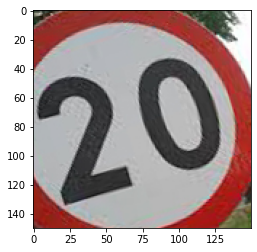

In [ ]:
!ls "/content/drive/My Drive/Universidad/FSI/Practica2/Señales Tráfico/"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Universidad/FSI/Practica2/Señales Tráfico/20/50.jpg', 'r')
imshow(np.asarray(pil_im))



## Primer modelo

In [ ]:
# DATA SOURCE --------------------------------------------------

image_size = (150, 150)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/Universidad/FSI/Practica2/Señales Tráfico",
    validation_split=0.1,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/Universidad/FSI/Practica2/Señales Tráfico",
    validation_split=0.1,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

train_ds = train_ds.prefetch(buffer_size=30)
val_ds = val_ds.prefetch(buffer_size=30)

Found 561 files belonging to 10 classes.
Using 505 files for training.
Found 561 files belonging to 10 classes.
Using 56 files for validation.


In [ ]:
# MODEL --------------------------------------------------

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Rescaling, Flatten
from tensorflow.keras.callbacks import EarlyStopping







model = keras.Sequential()
model.add(Rescaling(scale=(1./127.5),
                    offset=-1, 
                    input_shape=(150, 150, 3)))

model.add(Conv2D(32, (3, 3), activation='relu'))            #72
model.add(MaxPooling2D(pool_size=(4, 4)))                    #36
model.add(Dropout(0.30))  

model.add(Conv2D(64, (3, 3), activation='relu'))            #32
model.add(MaxPooling2D(pool_size=(4, 4)))                    #16
model.add(Dropout(0.30))


model.add(Conv2D(128, (3, 3), activation='relu'))            #8
model.add(MaxPooling2D(pool_size=(2, 2)))                    
model.add(Dropout(0.30))

model.add(Conv2D(256, (3, 3), activation='relu'))            #8
#model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.30))


"""

model.add(Conv2D(32, (3, 3), activation='relu'))            #72
model.add(MaxPooling2D(pool_size=(4, 4)))                    #36
model.add(Dropout(0.30))  

model.add(Conv2D(64, (3, 3), activation='relu'))            #32
model.add(MaxPooling2D(pool_size=(4, 4)))                    #16
model.add(Dropout(0.30))


model.add(Conv2D(128, (3, 3), activation='relu'))            #8
model.add(MaxPooling2D(pool_size=(2, 2)))                    
model.add(Dropout(0.30))

model.add(Conv2D(256, (3, 3), activation='relu'))            #8
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.30)) """




model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
             optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])

#tf.keras.optimizers.Adam(1e-3)


In [ ]:
# TRAINING --------------------------------------------------

epochs = 200

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, restore_best_weights=True)

h = model.fit(
        train_ds,
        epochs=epochs, 
        validation_data=val_ds,
        callbacks = [es]
)

Epoch 1/200
16/16 [==============================] - 2s 60ms/step - loss: 2.3530 - accuracy: 0.1168 - val_loss: 2.2996 - val_accuracy: 0.1429
Epoch 2/200
16/16 [==============================] - 1s 50ms/step - loss: 2.3073 - accuracy: 0.1069 - val_loss: 2.2993 - val_accuracy: 0.0536
Epoch 3/200
16/16 [==============================] - 1s 48ms/step - loss: 2.2907 - accuracy: 0.1267 - val_loss: 2.3033 - val_accuracy: 0.0536
Epoch 4/200
16/16 [==============================] - 1s 49ms/step - loss: 2.2923 - accuracy: 0.1149 - val_loss: 2.2870 - val_accuracy: 0.0893
Epoch 5/200
16/16 [==============================] - 1s 47ms/step - loss: 2.2780 - accuracy: 0.1327 - val_loss: 2.2752 - val_accuracy: 0.1607
Epoch 6/200
16/16 [==============================] - 1s 45ms/step - loss: 2.2536 - accuracy: 0.1545 - val_loss: 2.2573 - val_accuracy: 0.1250
Epoch 7/200
16/16 [==============================] - 1s 45ms/step - loss: 2.2329 - accuracy: 0.1743 - val_loss: 2.2327 - val_accuracy: 0.1250
Epoch 

In [ ]:
model.summary()


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_24 (Rescaling)    (None, 150, 150, 3)       0         
                                                                 
 conv2d_96 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_80 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 dropout_112 (Dropout)       (None, 37, 37, 32)        0         
                                                                 
 conv2d_97 (Conv2D)          (None, 35, 35, 64)        18496     
                                                                 
 max_pooling2d_81 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                

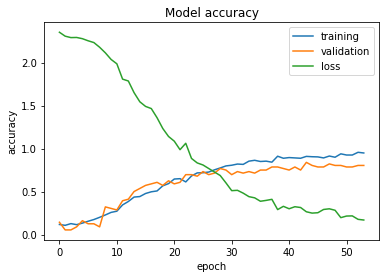

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show()

## Evaluación de los resultados

1/1 [==============================] - 0s 24ms/step
              precision    recall  f1-score   support

           0     0.6667    0.6667    0.6667         3
           1     1.0000    0.9000    0.9474        10
           2     1.0000    0.5000    0.6667         8
           3     1.0000    0.8571    0.9231         7
           4     1.0000    1.0000    1.0000         2
           5     0.8000    0.8000    0.8000         5
           6     0.2500    1.0000    0.4000         1
           7     0.8750    0.8750    0.8750         8
           8     0.6000    1.0000    0.7500         3
           9     0.9000    1.0000    0.9474         9

    accuracy                         0.8393        56
   macro avg     0.8092    0.8599    0.7976        56
weighted avg     0.8955    0.8393    0.8472        56



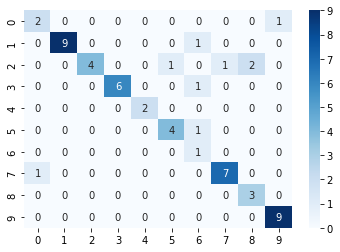

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

results = np.concatenate([(y, model.predict(x=x)) for x, y in val_ds], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4))

#Testear la red neuronal


La señal es de 100 km/h y la ha catalogado una señal de 70 km/h


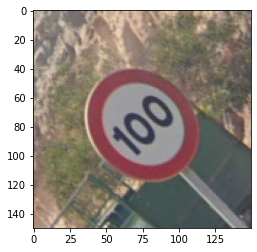


La señal es de 40 km/h y la ha catalogado una señal de 80 km/h


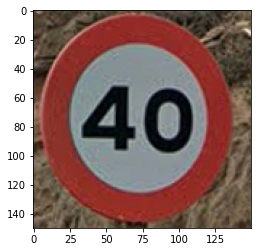


La señal es de 50 km/h y la ha catalogado una señal de 20 km/h


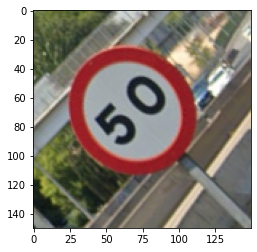


La señal es de 60 km/h y la ha catalogado una señal de 30 km/h


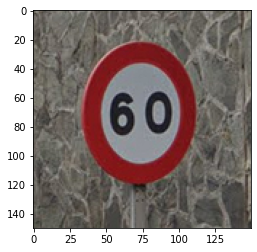


La señal es de 60 km/h y la ha catalogado una señal de 50 km/h


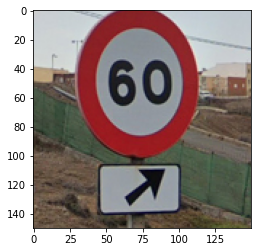


La señal es de 60 km/h y la ha catalogado una señal de 120 km/h


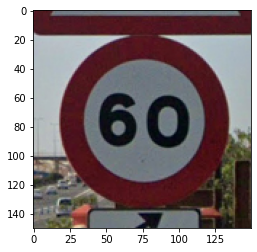


La señal es de 70 km/h y la ha catalogado una señal de 20 km/h


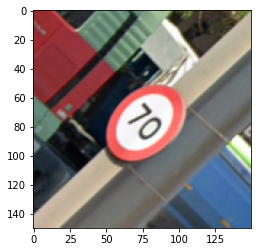


La señal es de 80 km/h y la ha catalogado una señal de 20 km/h


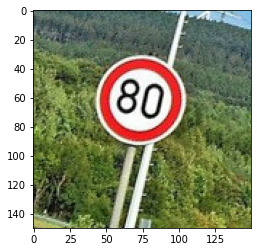



En este test se ha obtenido 8 fallos de 490 comprobaciones


In [ ]:
"""img = keras.preprocessing.image.load_img(
    '/content/drive/My Drive/Universidad/FSI/Practica2/Señales Tráfico/10/10.jpg', target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
print(np.argmax(predictions[0]))"""
import matplotlib.pyplot as plt

clases=["100","120","20","30","40","50","60","70","80","90"]
fallos=0
comprobaciones=0
for i in range(0,10):
  for j in range(1,50):
    comprobaciones = comprobaciones +1
    img = keras.preprocessing.image.load_img(
    '/content/drive/My Drive/Universidad/FSI/Practica2/Señales Tráfico/'+clases[i]+'/'+str(j)+'.jpg', target_size=image_size)
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    predictions = model.predict(img_array,verbose=0)
    #print(np.argmax(predictions[0]))
    if(np.argmax(predictions[0])!=i):
        fallos=fallos+1
        print("\nLa señal es de "+clases[i]+" km/h y la ha catalogado una señal de "+clases[np.argmax(predictions[0])]+" km/h") 
        pil_im = Image.open('/content/drive/My Drive/Universidad/FSI/Practica2/Señales Tráfico/'+clases[i]+'/'+str(j)+'.jpg', 'r')
        plt.imshow(np.asarray(pil_im))
        plt.show()
    
print("\n\nEn este test se ha obtenido " + str(fallos) + " fallos de "+ str(comprobaciones)+ " comprobaciones")

32
24
1/1 [==============================] - 0s 23ms/step
              precision    recall  f1-score   support

           0     0.6667    0.6667    0.6667         3
           1     1.0000    0.9000    0.9474        10
           2     1.0000    0.5000    0.6667         8
           3     1.0000    0.8571    0.9231         7
           4     1.0000    1.0000    1.0000         2
           5     0.8000    0.8000    0.8000         5
           6     0.2500    1.0000    0.4000         1
           7     0.8750    0.8750    0.8750         8
           8     0.6000    1.0000    0.7500         3
           9     0.9000    1.0000    0.9474         9

    accuracy                         0.8393        56
   macro avg     0.8092    0.8599    0.7976        56
weighted avg     0.8955    0.8393    0.8472        56



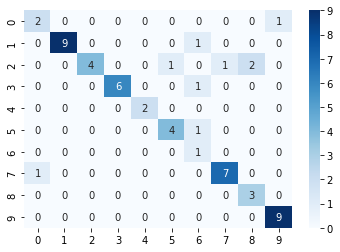

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

for x, y in val_ds:
  print(len(y))

results = np.concatenate([(y, model.predict(x=x)) for x, y in val_ds], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4))